# DNN Model

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

2023-01-10 11:23:28.690859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-10 11:23:28.818302: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-10 11:23:28.818318: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-10 11:23:29.453759: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# data loading from .npz generated from tcr_data_process.ipynb
# loading train data
npz = np.load('data_train.npz')
train_inputs = npz['input'].astype(np.float64)
train_targets = npz['targets'].astype(np.float64)
# loading validation data
npz = np.load('data_validation.npz')
validation_inputs, validation_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

npz = np.load('data_test.npz')
test_inputs, test_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

# ANN Model

Outline, Optimizer, Loss function, Early stopping and Training rate

In [3]:
# NN model prep
input_size = 3
output_size = 1
hidden_layer_1_size = 15
hidden_layer_2_size = 15
hidden_layer_3_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size),
    tf.keras.layers.Dense(hidden_layer_1_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_2_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_3_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='linear')
])


2023-01-10 11:23:30.269872: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-10 11:23:30.269907: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-10 11:23:30.269925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (uchp-parmar.icpf.cas.cz): /proc/driver/nvidia/version does not exist
2023-01-10 11:23:30.270181: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# model prep, optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [5]:
# Training
BATCH_SIZE = 1
MAX_EPOCHS = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [6]:
# fit the model
history = model.fit(
    train_inputs, train_targets, batch_size=BATCH_SIZE,epochs=MAX_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=2
          )

Epoch 1/1000
640/640 - 1s - loss: 1.5699 - root_mean_squared_error: 1.2530 - val_loss: 1.4725 - val_root_mean_squared_error: 1.2135 - 1s/epoch - 2ms/step
Epoch 2/1000
640/640 - 1s - loss: 1.4151 - root_mean_squared_error: 1.1896 - val_loss: 1.3366 - val_root_mean_squared_error: 1.1561 - 550ms/epoch - 860us/step
Epoch 3/1000
640/640 - 1s - loss: 1.2945 - root_mean_squared_error: 1.1378 - val_loss: 1.2252 - val_root_mean_squared_error: 1.1069 - 645ms/epoch - 1ms/step
Epoch 4/1000
640/640 - 1s - loss: 1.1939 - root_mean_squared_error: 1.0926 - val_loss: 1.1304 - val_root_mean_squared_error: 1.0632 - 589ms/epoch - 920us/step
Epoch 5/1000
640/640 - 1s - loss: 1.1082 - root_mean_squared_error: 1.0527 - val_loss: 1.0563 - val_root_mean_squared_error: 1.0278 - 588ms/epoch - 920us/step
Epoch 6/1000
640/640 - 1s - loss: 1.0444 - root_mean_squared_error: 1.0219 - val_loss: 1.0000 - val_root_mean_squared_error: 1.0000 - 591ms/epoch - 923us/step
Epoch 7/1000
640/640 - 1s - loss: 0.9901 - root_mean_

In [7]:
# ANN model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 3)                    12        
                                                                 
 dense_1 (Dense)             (1, 15)                   60        
                                                                 
 dense_2 (Dense)             (1, 15)                   240       
                                                                 
 dense_3 (Dense)             (1, 10)                   160       
                                                                 
 dense_4 (Dense)             (1, 1)                    11        
                                                                 
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


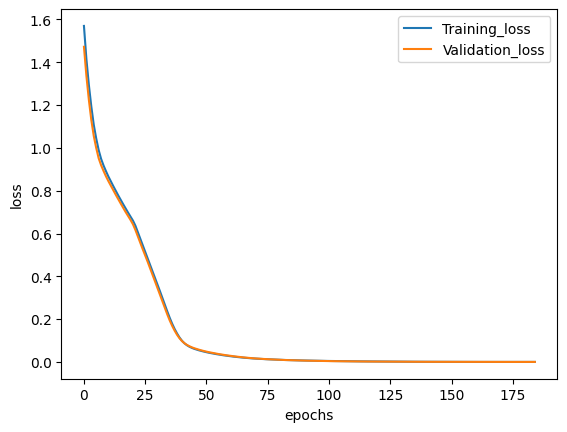

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('loss.png')

# Model check on Test data

In [9]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

3/3 [==============================] - 0s 2ms/step - loss: 3.2080e-06 - root_mean_squared_error: 0.0018


In [10]:
print('\nTest loss: {0:.4f}. Test accuracy: {1:.4f} rmse'.format(test_loss, test_accuracy))


Test loss: 0.0000. Test accuracy: 0.0018 rmse


In [11]:
prediction = model.predict(test_inputs)
data_inputs = pd.DataFrame(test_inputs)
prediction = pd.DataFrame(np.round(prediction,3))
test_targets = pd.DataFrame(test_targets)
pred_accu = np.round((prediction/test_targets)*100,2)

result = pd.concat([test_targets, prediction, pred_accu], axis = 1, ignore_index=True)
result.columns = ['Target-St(%)', 'Prediction-St(%)','Pred-Accu-St(%)']
result

3/3 [==============================] - 0s 2ms/step


,Target-St(%),Prediction-St(%),Pred-Accu-St(%)
0,0.968,0.970,100.21
1,0.975,0.978,100.31
2,0.968,0.970,100.21
3,0.977,0.977,100.00
4,0.985,0.985,100.00
...,...,...,...
75,0.930,0.935,100.54
76,0.961,0.964,100.31
77,0.977,0.975,99.80
78,0.971,0.970,99.90


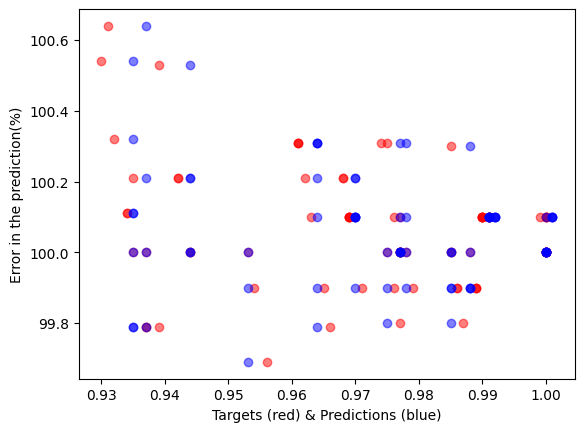

In [22]:
import matplotlib.pyplot as plt
plt.scatter(result['Target-St(%)'], result['Pred-Accu-St(%)'], alpha=0.5, color='r')
plt.scatter(result['Prediction-St(%)'], result['Pred-Accu-St(%)'],alpha=0.5, color='b')
plt.ylabel('Error in the prediction(%)')
plt.xlabel('Targets (red) & Predictions (blue)')
plt.savefig('pred1.png')

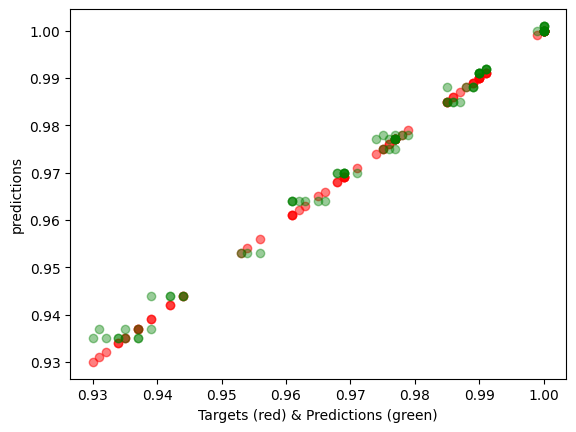

In [21]:
plt.scatter(result['Target-St(%)'], result['Target-St(%)'], alpha=0.5, color='r')
plt.scatter(result['Target-St(%)'], result['Prediction-St(%)'], alpha=0.4, color='g')

plt.ylabel('predictions')
plt.xlabel('Targets (red) & Predictions (green)')
plt.savefig('pred2.png')

In [14]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(test_targets, prediction)
np.round(r2_score_test,4)

0.9935

In [15]:
# estimation of adjusted R2 score
n = np.size(test_targets)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
np.round(adj_r2_score,4)

0.9932

In [16]:
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ANN model:", np.round(uncertainty_model[0],2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],2), '[%]')

Uncertainty of the ANN model: 0.17 [%]
Average test prediction precision 99.83 [%]


# ANN Model Deployment

ANN model deployment for micro DSC error prediction

In [17]:
import keras
model.save('micro_dsc_dl.h5')

In [18]:
import keras
model.save('micro_dsc_dl.hdf5')